In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import sklearn
import tqdm


lgb.__version__, sklearn.__version__, pd.__version__, np.__version__, tqdm.__version__

('3.2.0', '0.22.1', '1.0.1', '1.18.1', '4.42.1')

In [2]:
path_to_data = r'C:/Users/Admin/Desktop/made/Semester 2/Production ML/HW1/ml_project/data/raw/'
path_dataset = path_to_data + 'heart_disease_uci.csv'

data = pd.read_csv(path_dataset)
display(data.head())

target_name = 'target'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
%cd {'C:\\Users\\Admin\\Desktop\\made\\Semester 2\\Production ML\\HW1\\ml_project'}

C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project


In [4]:
from src.preprocessing import calc_data_stats, explore_features

In [5]:
calc_data_stats(data)

,Feature,Unique_values,Missing values ratio,Largest category rate,Type
0,age,41,0.0,0.062706,int64
1,sex,2,0.0,0.683168,int64
2,cp,4,0.0,0.471947,int64
3,trestbps,49,0.0,0.122112,int64
4,chol,152,0.0,0.019802,int64
5,fbs,2,0.0,0.851485,int64
6,restecg,3,0.0,0.501650,int64
7,thalach,91,0.0,0.036304,int64
8,exang,2,0.0,0.673267,int64
9,oldpeak,40,0.0,0.326733,float64


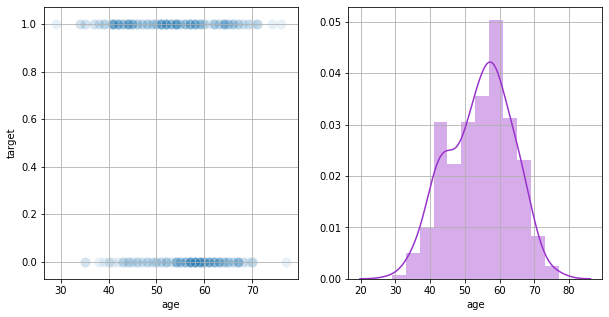

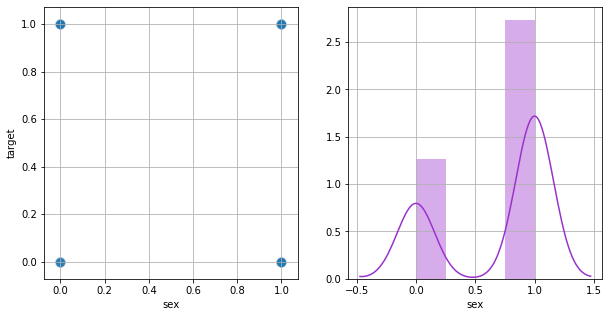

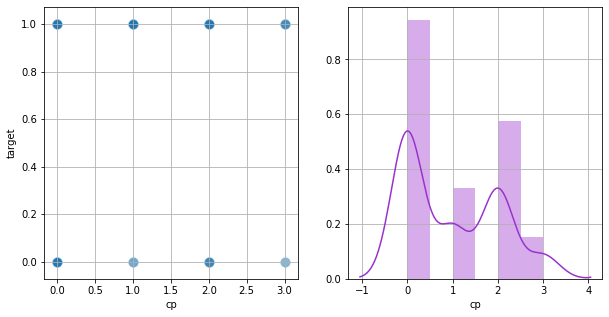

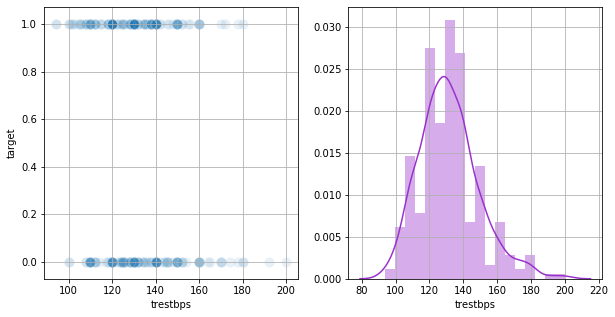

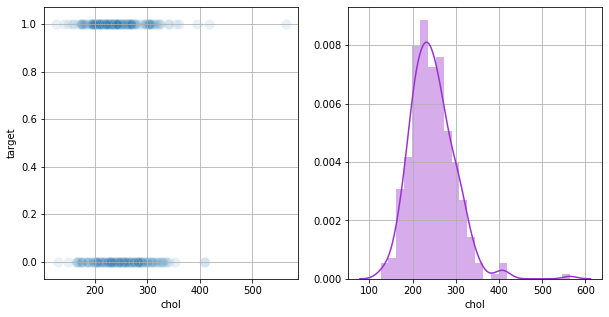

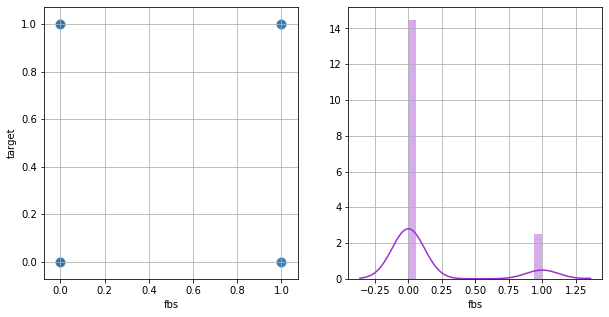

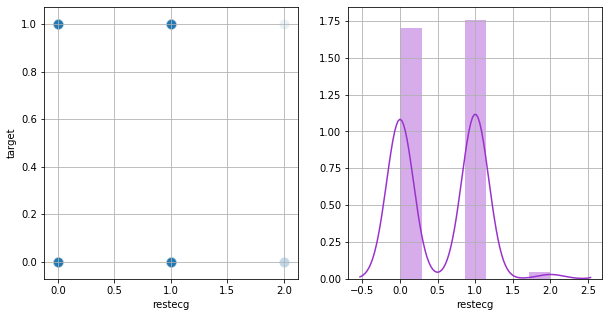

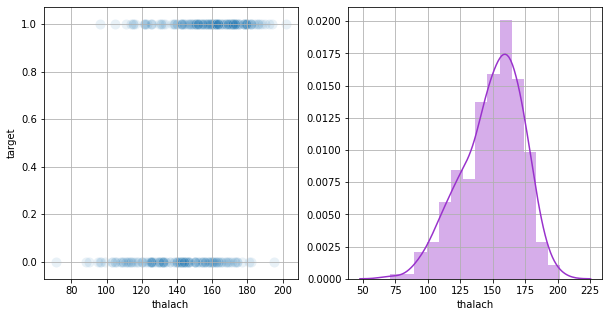

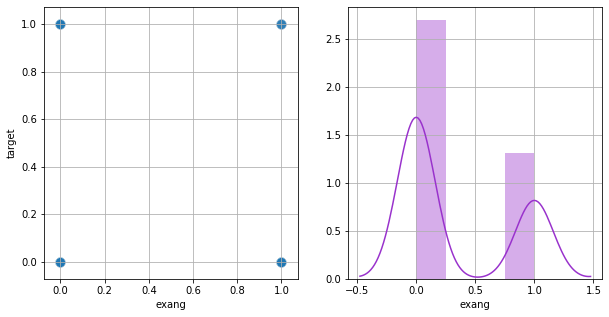

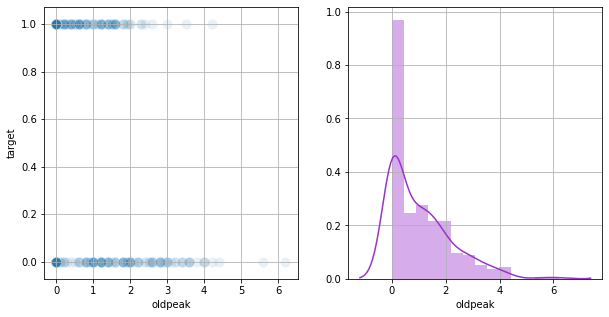

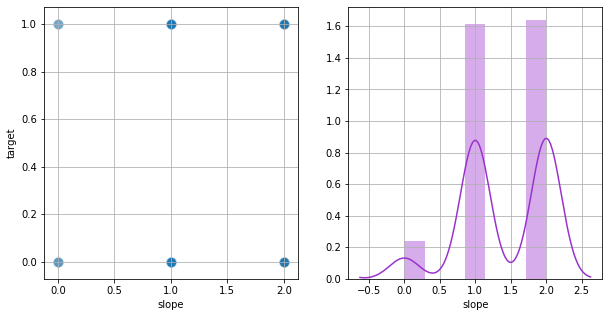

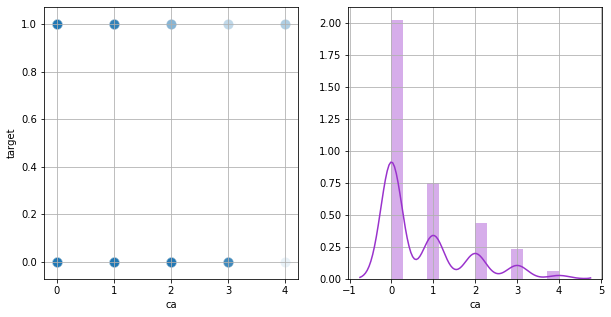

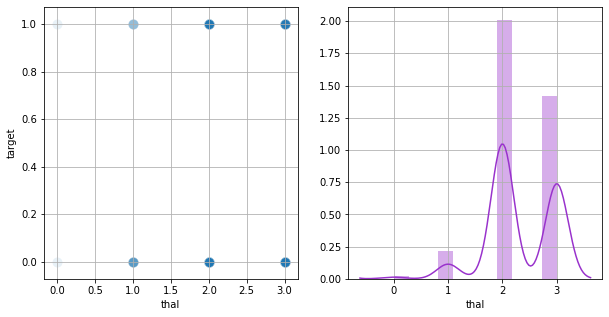

In [6]:
explore_features(data, target_name, [f for f in data.columns if f!= target_name])

In [7]:
### will be used in faker later
data.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### pipeline runs examples

In [8]:
from src.training import train_pipeline
from src.inference import inference_pipeline

2021-05-10 14:57:39 INFO     Training pipeline started
2021-05-10 14:57:39 INFO     Reading training pipeline parameters
2021-05-10 14:57:39 INFO     Parsing config
2021-05-10 14:57:39 INFO     Reading data from path: C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\data\raw\heart_disease_uci.csv
2021-05-10 14:57:39 INFO     Data shape: (303, 14), Data columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
2021-05-10 14:57:39 INFO     Splitting data with params: SplittingParams(test_size=0.2, random_state=8)
2021-05-10 14:57:39 INFO     Train data: (242, 14), Test data: (61, 14)
2021-05-10 14:57:39 INFO     Recognizing features with train data
2021-05-10 14:57:39 INFO     Recognized features:
categorical: ['sex', 'fbs', 'restecg', 'exang', 'slope']
numeric: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
2021-05-10 14:57:39 INFO     Creating feature transformer pipeline

C:\Anaconda2020\Anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


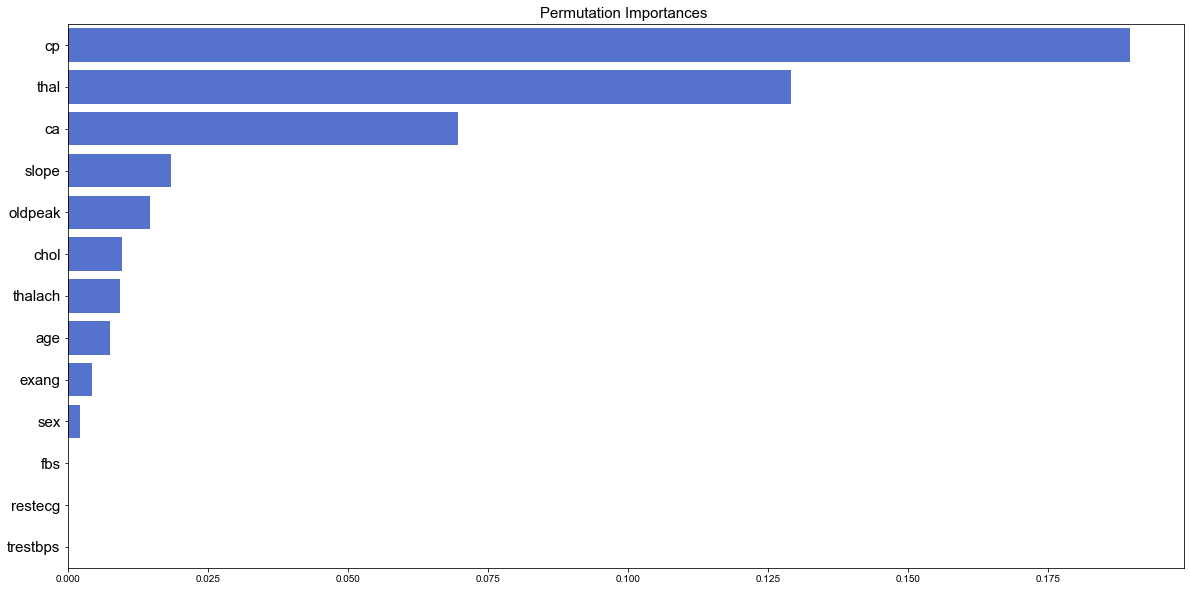

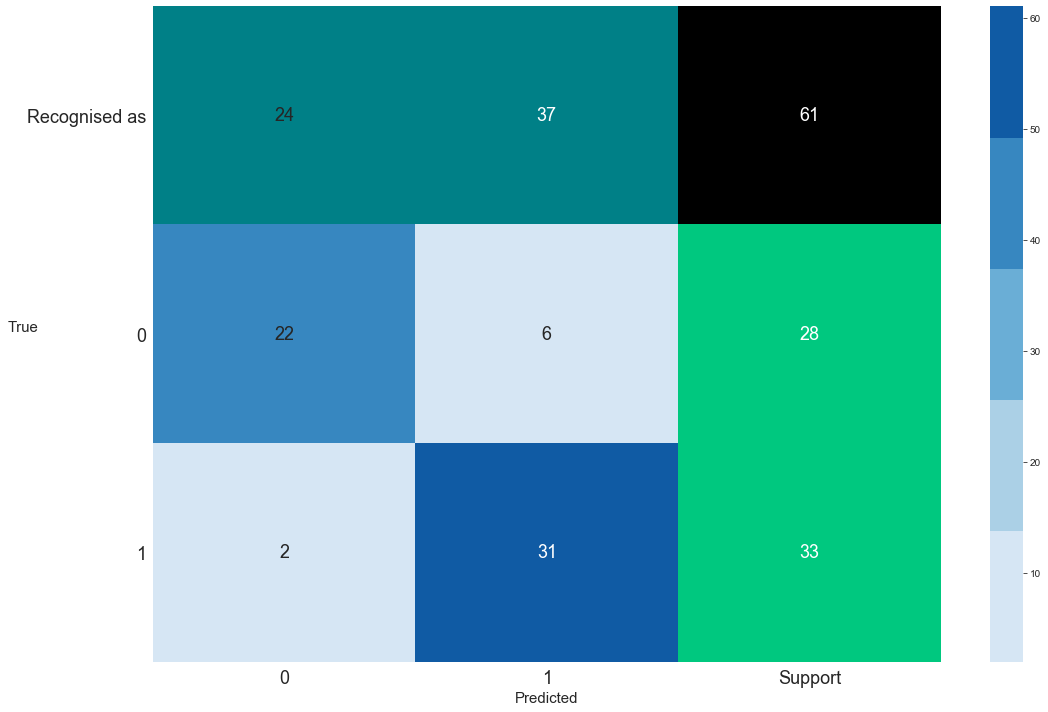

{'accuracy': 0.8688524590163934,
 'f1-score': 0.8857142857142858,
 'gini': 0.9145021645021645,
 'precision': 0.8378378378378378,
 'recall': 0.9393939393939394}
              precision    recall  f1-score   support

           0     0.9167    0.7857    0.8462        28
           1     0.8378    0.9394    0.8857        33

    accuracy                         0.8689        61
   macro avg     0.8773    0.8626    0.8659        61
weighted avg     0.8740    0.8689    0.8676        61

2021-05-10 14:57:41 INFO     Saving classifier to C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\models\classifier
2021-05-10 14:57:41 INFO     Saving optimal cutoff to C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\models\optimal_cutoff
2021-05-10 14:57:41 INFO     Saving transformation pipeline to C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\models\transformers
2021-05-10 14:57:41 INFO     Saving initial categorical feature list to C:\Users\A

In [9]:
path_to_config = r'C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\configs\train\train_config_v0.yaml'
train_pipeline(path_to_config, display_report=True)

2021-05-10 14:57:41 INFO     Inference pipeline started
2021-05-10 14:57:41 INFO     Reading inference pipeline parameters
2021-05-10 14:57:41 INFO     Parsing config
2021-05-10 14:57:41 INFO     Loading model components from path: C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\models\
2021-05-10 14:57:41 INFO     Loading data from path: C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\data\raw\heart_disease_uci.csv
2021-05-10 14:57:41 INFO     Data shape: (303, 14), Data columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
2021-05-10 14:57:41 INFO     Checking dataframe for model consistency
2021-05-10 14:57:41 INFO     Creating features
2021-05-10 14:57:41 INFO     Features shape: (303, 13)
2021-05-10 14:57:41 INFO     Extracting target if provided
2021-05-10 14:57:41 INFO     Target shape: (303,)
2021-05-10 14:57:41 INFO     Scoring with model
2021-05-10 14:57:41 IN

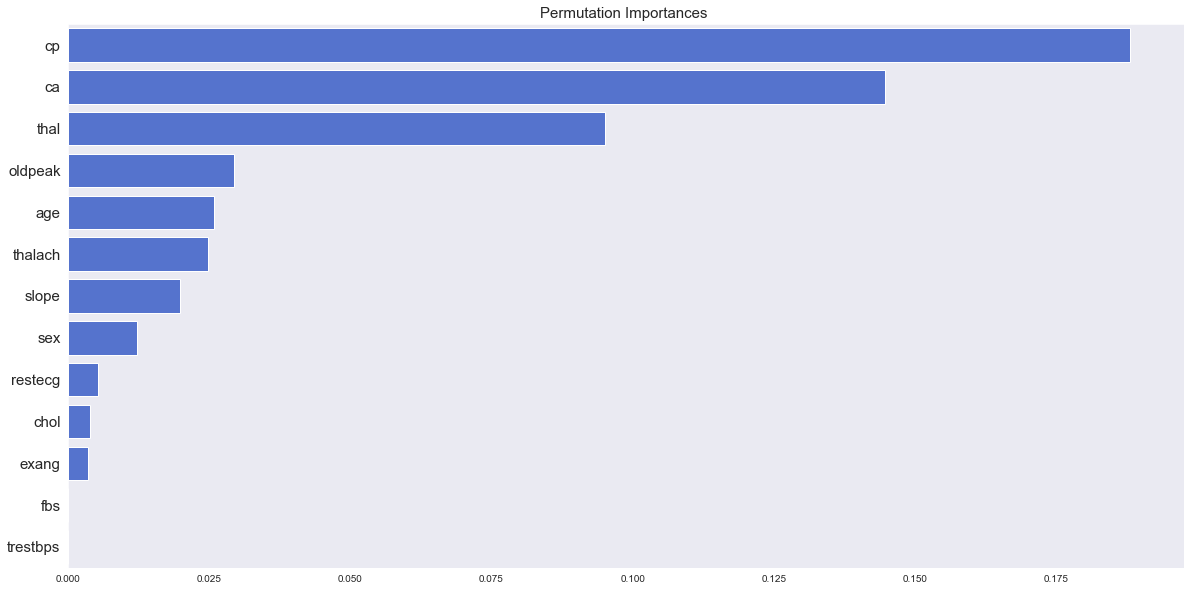

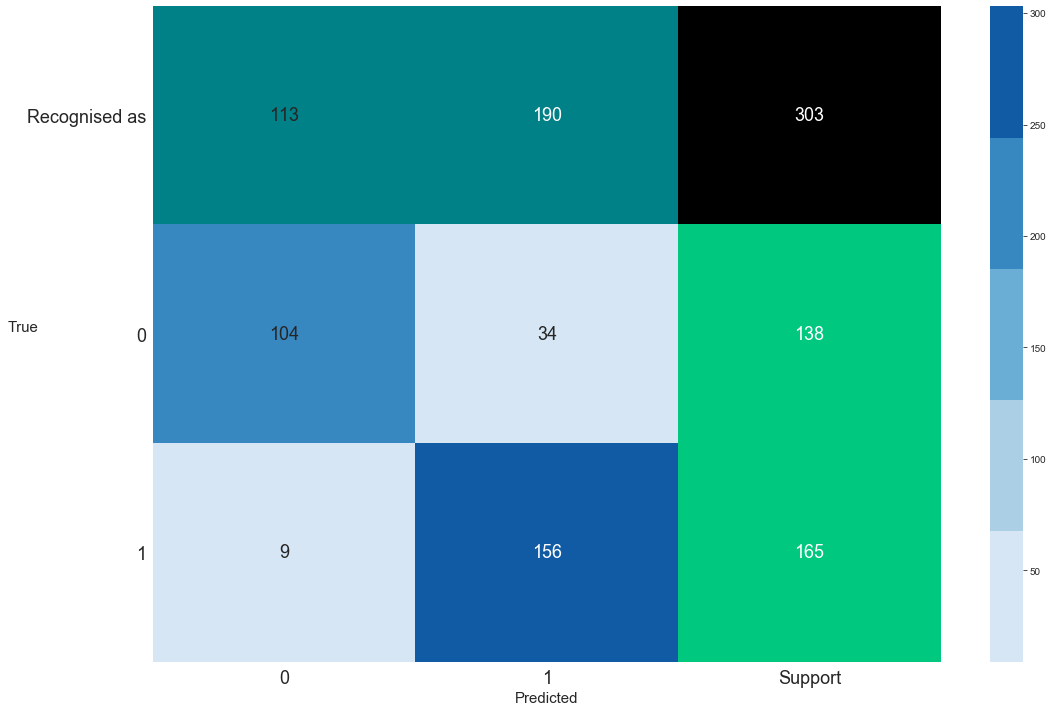

{'accuracy': 0.858085808580858,
 'f1-score': 0.8788732394366197,
 'gini': 0.89187527448397,
 'precision': 0.8210526315789474,
 'recall': 0.9454545454545454}
              precision    recall  f1-score   support

           0     0.9204    0.7536    0.8287       138
           1     0.8211    0.9455    0.8789       165

    accuracy                         0.8581       303
   macro avg     0.8707    0.8495    0.8538       303
weighted avg     0.8663    0.8581    0.8560       303

2021-05-10 14:57:43 INFO     Finished


In [10]:
path_to_config = r'C:\Users\Admin\Desktop\made\Semester 2\Production ML\HW1\ml_project\configs\inference\inference_config_v0.yaml'
inference_pipeline(path_to_config, display_report=True)